# California Housing Price Prediction ML models

I have tried to make a ML model which can predict the price of a home in california given data about it.
The maximum achieved accuracy is of ~81.13%

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Data from CSV

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Cleaning up data
Cleaning up the missing data entries so that there are no null entries

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


# Visualizing using histograms

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

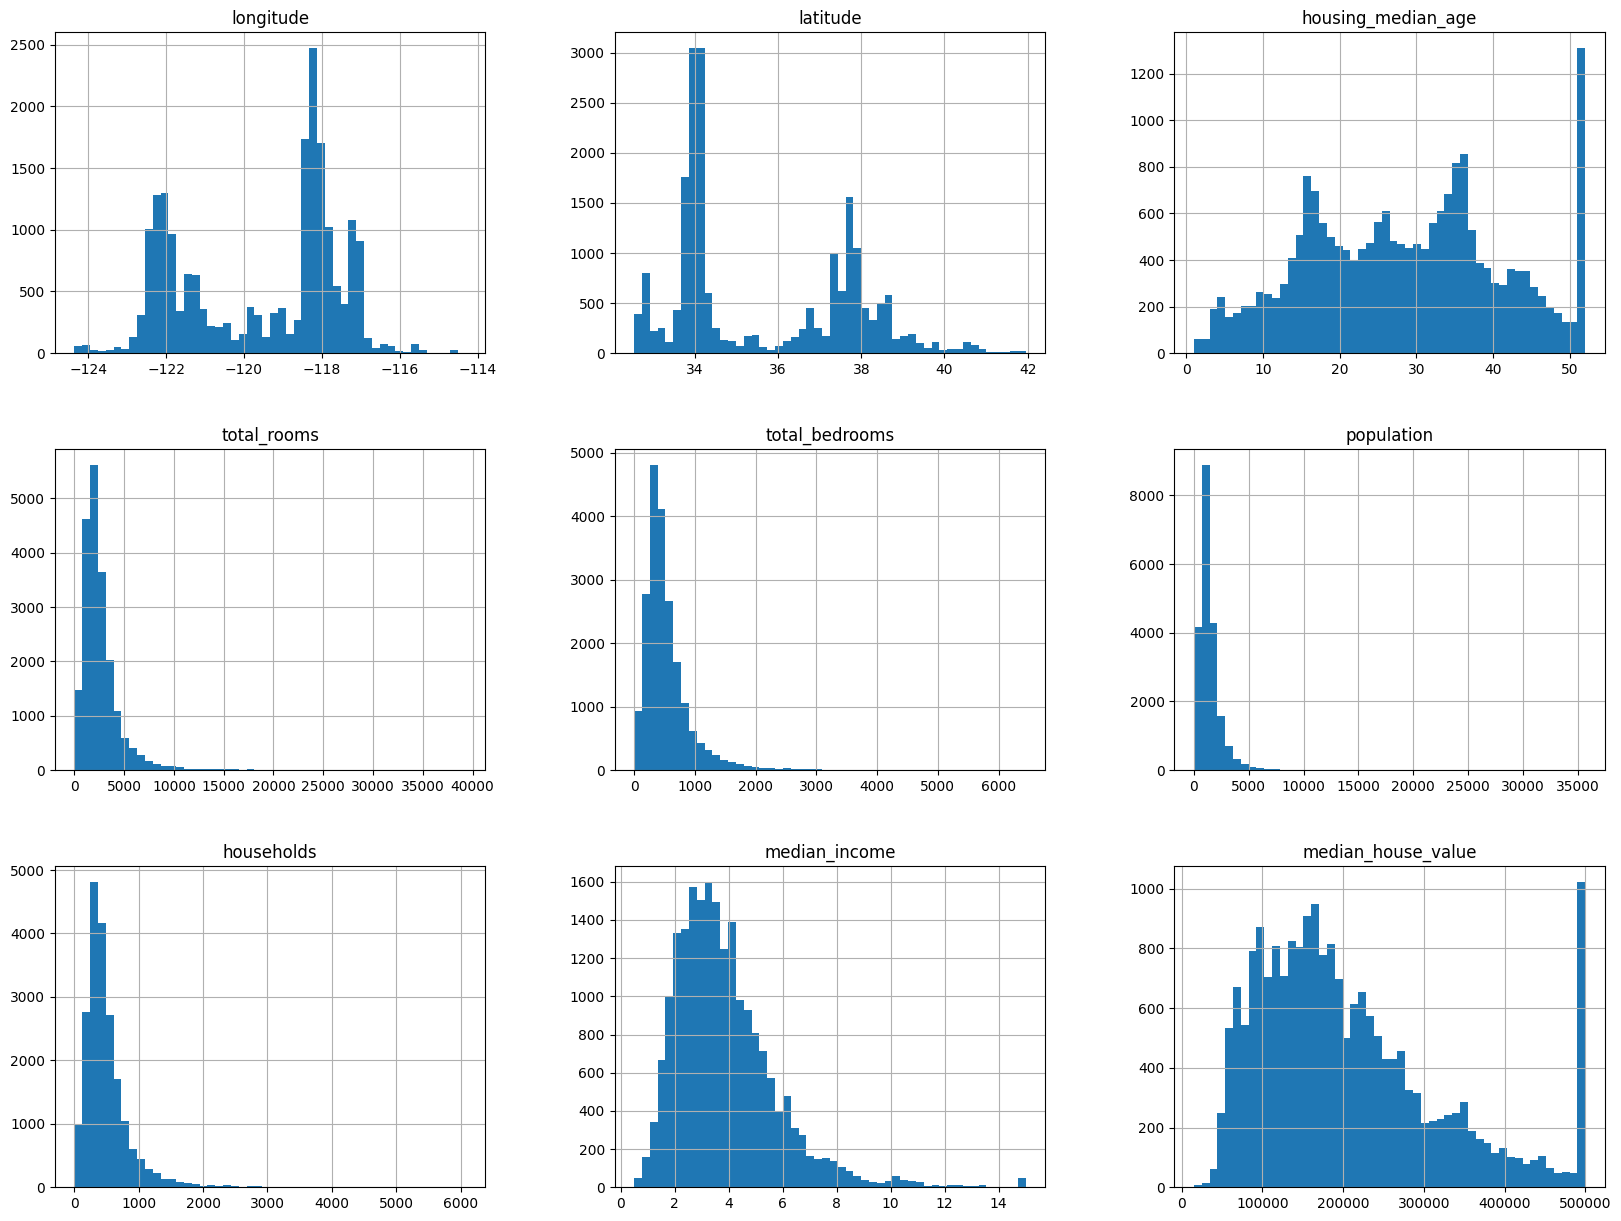

In [7]:
data.hist(bins=50, figsize=(20, 15))

In [8]:
data['total_rooms'] = np.log(data['total_rooms'] + 1)
data['total_bedrooms'] = np.log(data['total_bedrooms'] + 1)
data['population'] = np.log(data['population'] + 1)
data['households'] = np.log(data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

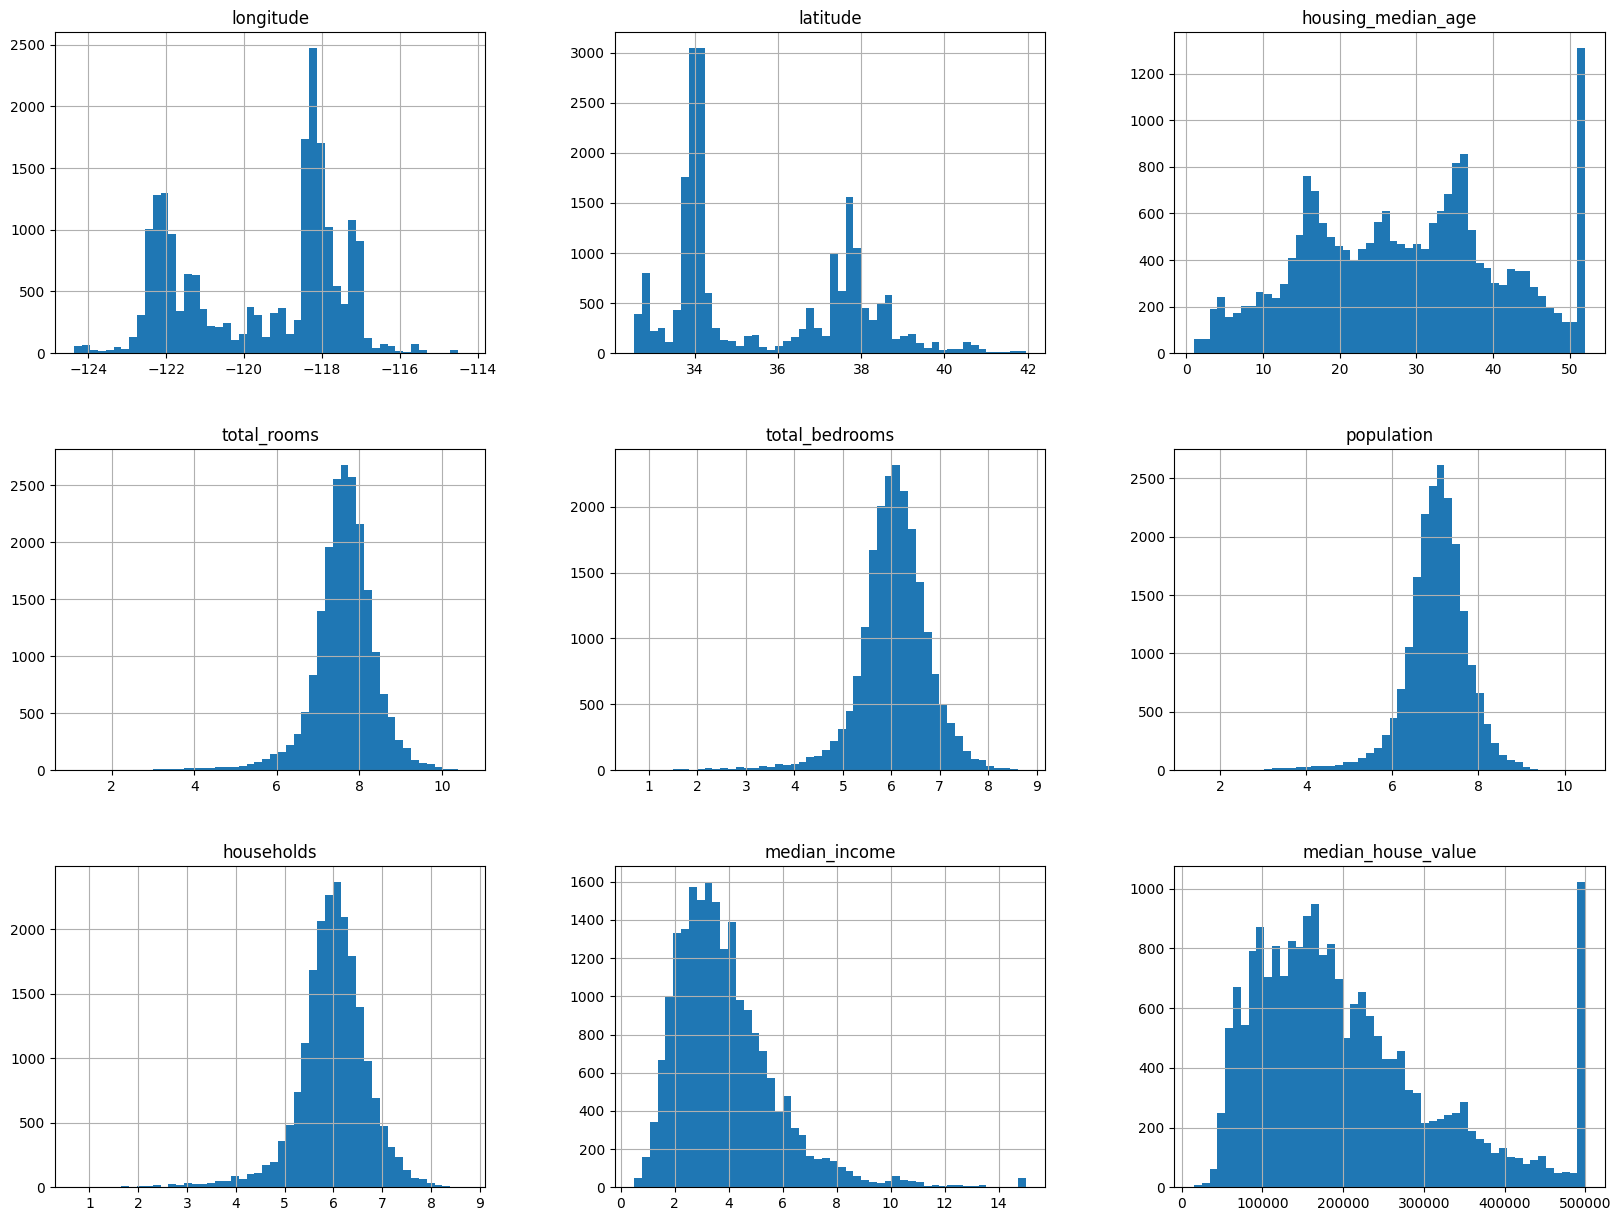

In [9]:
data.hist(bins=50, figsize=(20, 15))

### Modifing to remove non-usable data
In this case, the ocean_proximity has vaious parameters which cannot be used to train a model.
So we need to convert it into 4 different coloumns with true or false values so as to make it useful.

In [10]:
data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [11]:
data = data.join(pd.get_dummies(data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [12]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,False,True,False,False,False


In [13]:
data['<1H OCEAN'] = data['<1H OCEAN'].astype(int)
data['INLAND'] = data['INLAND'].astype(int)
data['ISLAND'] = data['ISLAND'].astype(int)
data['NEAR BAY'] = data['NEAR BAY'].astype(int)
data['NEAR OCEAN'] = data['NEAR OCEAN'].astype(int)

In [14]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,0,1,0,0,0


In [15]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,7.629543,6.054708,7.025121,5.984538,3.871162,206864.413155,0.442128,0.317917,0.000245,0.111095,0.128615
std,2.003578,2.136348,12.591805,0.750260,0.726728,0.736336,0.726856,1.899291,115435.667099,0.496652,0.465678,0.015641,0.314257,0.334782
min,-124.350000,32.540000,1.000000,1.098612,0.693147,1.386294,0.693147,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,7.280008,5.693732,6.669498,5.638355,2.563700,119500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,7.662938,6.077642,7.062192,6.016157,3.536500,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.720000,37.000000,8.053251,6.473891,7.451822,6.405228,4.744000,264700.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,10.579514,8.771215,10.482430,8.713253,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data correlation
- A data correlation matrix is a table that displays the correlation coefficients between multiple variables. 
- Each cell in the matrix shows the strength and direction of the linear relationship between a pair of variables, with values ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation). 
- This matrix helps in identifying which variables are related and can be useful for feature selection in machine learning and data analysis.

In [16]:
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.029967,0.060817,0.109259,0.055823,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.032552,-0.068248,-0.136543,-0.088207,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.313918,-0.272112,-0.243011,-0.241630,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.029967,-0.032552,-0.313918,1.000000,0.945865,0.864580,0.931700,0.205800,0.158506,0.020809,-0.012862,-0.007567,-0.016499,0.002862
total_bedrooms,0.060817,-0.068248,-0.272112,0.945865,1.000000,0.897523,0.974593,-0.025575,0.053311,0.041725,-0.044914,-0.001902,-0.016793,0.016429
population,0.109259,-0.136543,-0.243011,0.864580,0.897523,1.000000,0.932190,-0.004850,-0.021904,0.115020,-0.071775,-0.012866,-0.059377,-0.014457
households,0.055823,-0.088207,-0.241630,0.931700,0.974593,0.932190,1.000000,0.003918,0.072765,0.072391,-0.087137,-0.009222,-0.005827,0.019715
median_income,-0.015550,-0.079626,-0.118278,0.205800,-0.025575,-0.004850,0.003918,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.158506,0.053311,-0.021904,0.072765,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378
<1H OCEAN,0.320831,-0.446928,0.045553,0.020809,0.041725,0.115020,0.072391,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018


<Axes: >

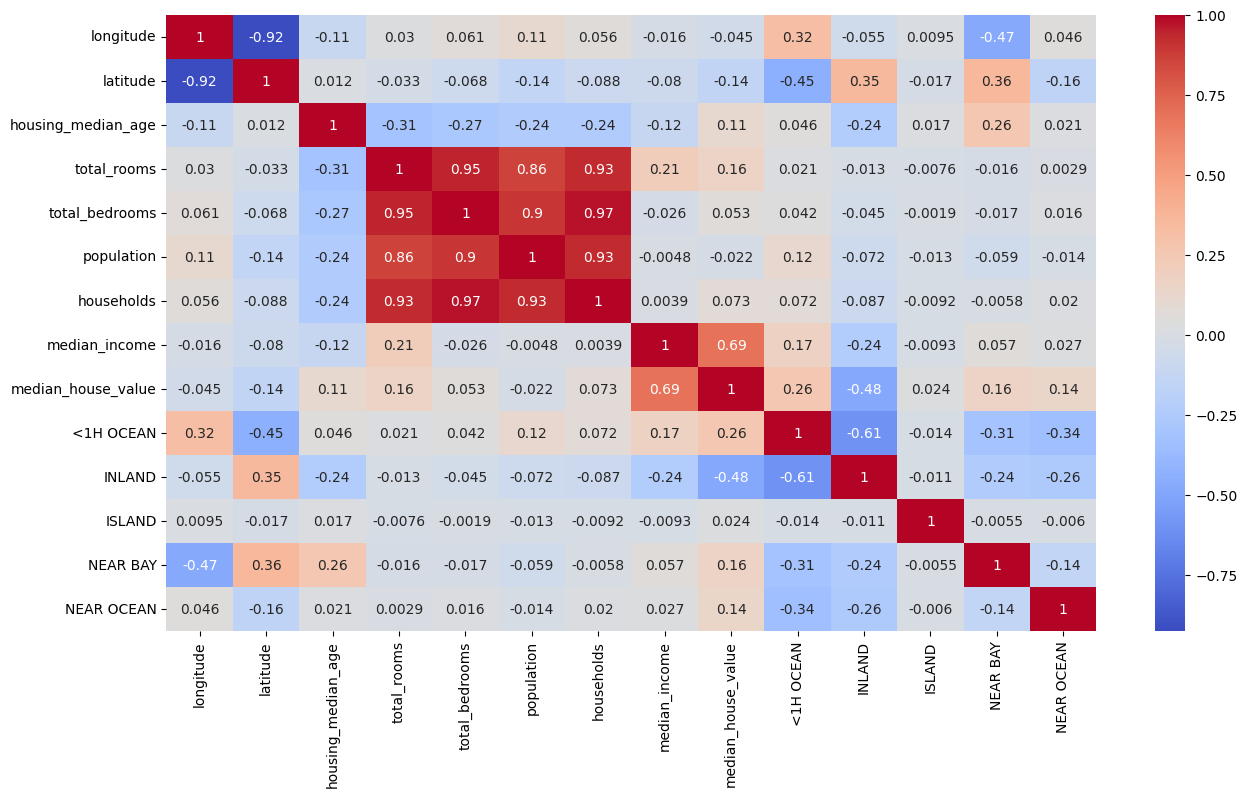

In [17]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")

## Heat Map of California house prices

Using the longitude and latitude to draw a map of the area, we find that the house prices appear high near the bay area.
Thus we can be sure that we are working with good data.

<Axes: xlabel='longitude', ylabel='latitude'>

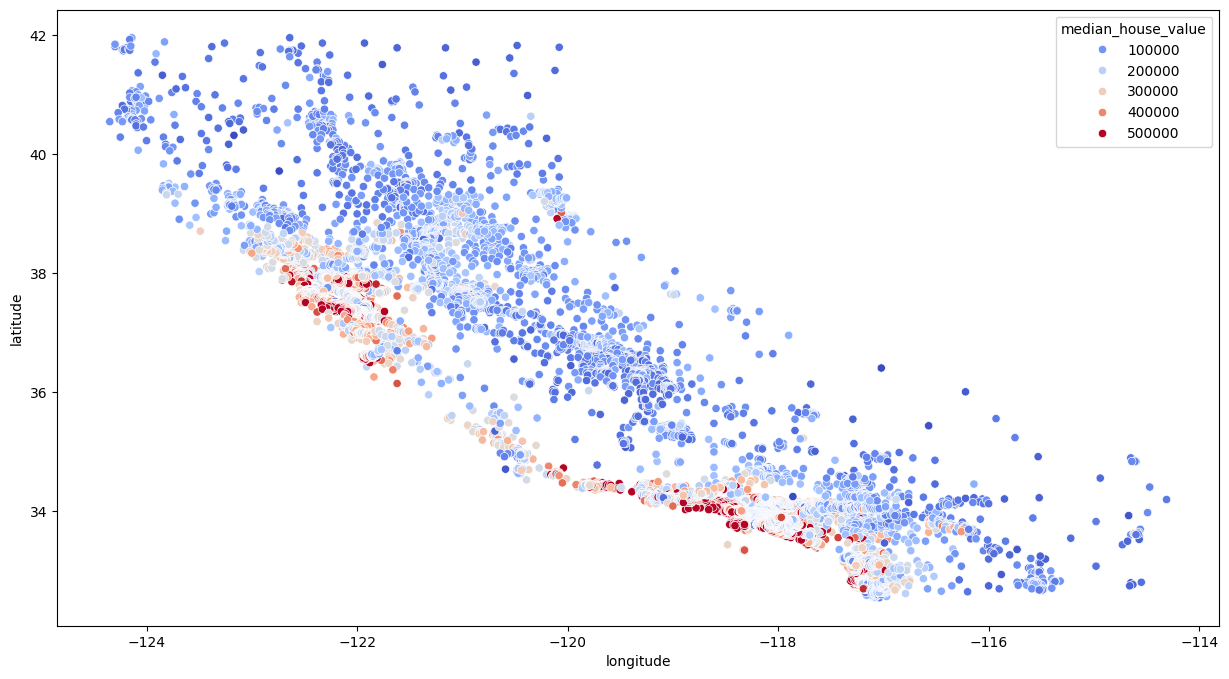

In [18]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='longitude', y='latitude', data=data, hue='median_house_value', palette="coolwarm")

## Feature Engineering
- Feature engineering is the process of using domain knowledge to create new features that make machine learning models work better.
- It involves transforming raw data into informative features that better represent the underlying problem.

Here, features such as 
- total bedrooms and total rooms dont mean as much as the ratio of the bedrooms to the total rooms.
- total rooms and total households don't mean as much as the average number of rooms in a single household.

In [19]:
data['bedroom_ratio'] = data['total_bedrooms'] / data['total_rooms']
data['houseshold_rooms'] = data['total_rooms'] / data['households']

<Axes: >

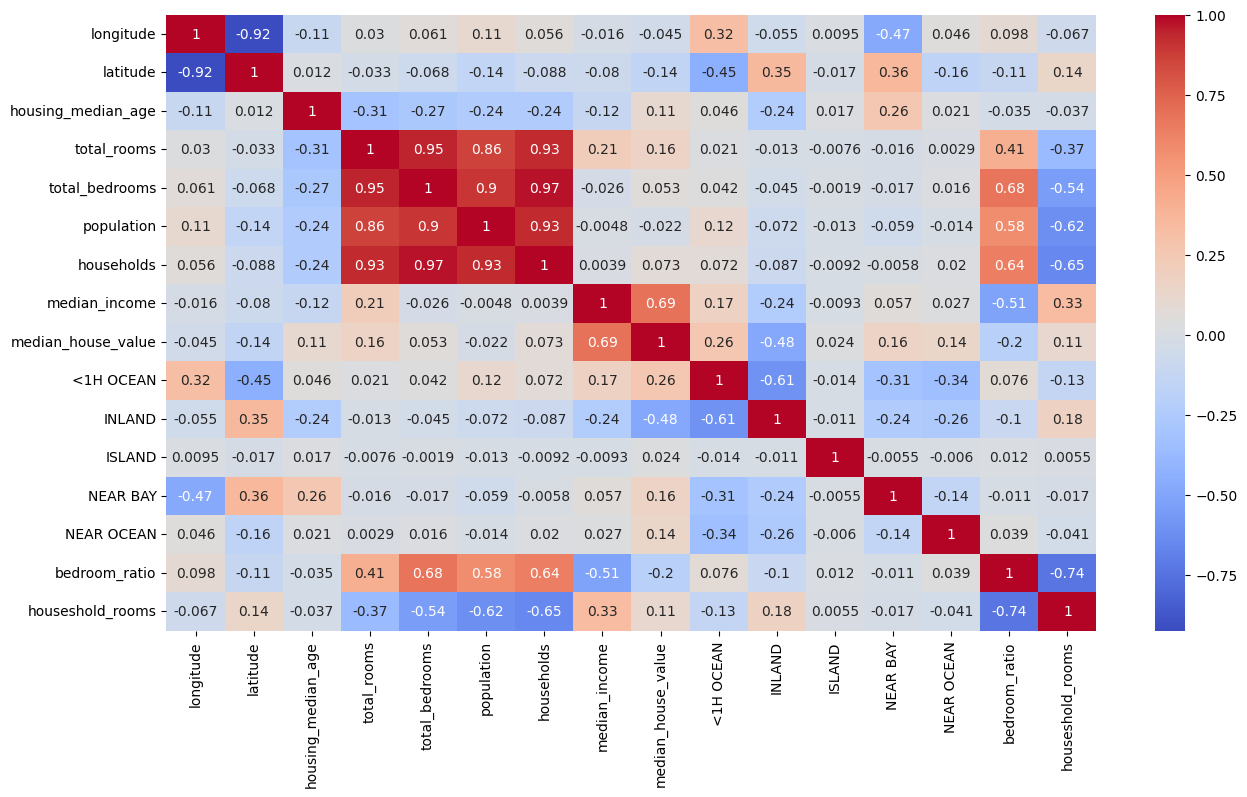

In [20]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")

## Seperating Test and Train Data Sets

This helps to verify our model once it is trained.

Here, I choose to split 20% of the model for testing using train_test_split which randomly splits the data to ensure fair seperation.

### Verifying Data Sets
Later on, it is import to check if both the testing and training data sets are diverse enough.
It means that the statical signals such as min, max, mean etc should approximately be the same
                                       

In [21]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

train_data = X_train.join(y_train)
test_data = X_test.join(y_test)

In [22]:
train_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,houseshold_rooms,median_house_value
count,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000
mean,-119.566841,35.633519,28.565092,7.631330,6.055439,7.026689,5.985470,3.876552,0.443534,0.318488,0.000306,0.111036,0.126636,0.792006,1.281057,206804.536890
std,2.003466,2.140324,12.534602,0.752287,0.728009,0.737927,0.727171,1.906513,0.496817,0.465904,0.017487,0.314187,0.332575,0.036772,0.076551,115494.449934
min,-124.350000,32.540000,1.000000,1.098612,0.693147,1.386294,0.693147,0.499900,0.000000,0.000000,0.000000,0.000000,0.000000,0.315465,0.941589,14999.000000
25%,-121.790000,33.930000,18.000000,7.279319,5.694572,6.668228,5.638355,2.566325,0.000000,0.000000,0.000000,0.000000,0.000000,0.771456,1.241557,119525.000000
50%,-118.490000,34.250000,29.000000,7.665285,6.075346,7.064759,6.016157,3.540050,0.000000,0.000000,0.000000,0.000000,0.000000,0.792562,1.273891,179650.000000
75%,-118.000000,37.720000,37.000000,8.055475,6.475433,7.455877,6.408529,4.738900,1.000000,1.000000,0.000000,0.000000,0.000000,0.813905,1.308031,264900.000000
max,-114.310000,41.950000,52.000000,10.579514,8.771215,10.482430,8.713253,15.000100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.169925,500001.000000


In [23]:
test_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,houseshold_rooms,median_house_value
count,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.0,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000
mean,-119.586078,35.632031,28.905065,7.622397,6.051784,7.018847,5.980811,3.849603,0.436506,0.315635,0.0,0.111329,0.136530,0.792456,1.281238,207103.888916
std,2.004197,2.120628,12.815983,0.742143,0.721661,0.729995,0.725670,1.870204,0.496013,0.464825,0.0,0.314577,0.343393,0.036500,0.087277,115214.063961
min,-124.230000,32.560000,1.000000,2.772589,1.386294,2.302585,1.098612,0.499900,0.000000,0.000000,0.0,0.000000,0.000000,0.500000,1.077626,14999.000000
25%,-121.800000,33.930000,18.000000,7.282074,5.686975,6.675823,5.641907,2.554550,0.000000,0.000000,0.0,0.000000,0.000000,0.772035,1.242313,119400.000000
50%,-118.520000,34.270000,29.000000,7.649693,6.079933,7.050989,6.021023,3.525000,0.000000,0.000000,0.0,0.000000,0.000000,0.793199,1.274359,180400.000000
75%,-118.020000,37.710000,38.000000,8.044145,6.461468,7.433075,6.393591,4.766900,1.000000,1.000000,0.0,0.000000,0.000000,0.813811,1.306585,264550.000000
max,-114.550000,41.950000,52.000000,10.235342,8.522778,9.387314,8.487970,15.000100,1.000000,1.000000,0.0,1.000000,1.000000,0.936895,3.560877,500001.000000


## Linear Regression

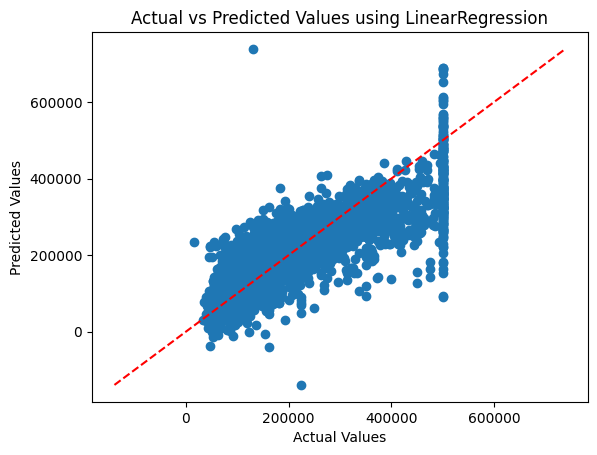

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values using LinearRegression')
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Fit (y = x)')

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
mse = mean_squared_error(y_test, y_pred)
mse

np.float64(4420238090.085872)

In [27]:
model.score(X_test, y_test)

0.6669258360608612

# Random Forest Regressor
This allows us to compute the result using a random forest regressor which is just many decision trees.

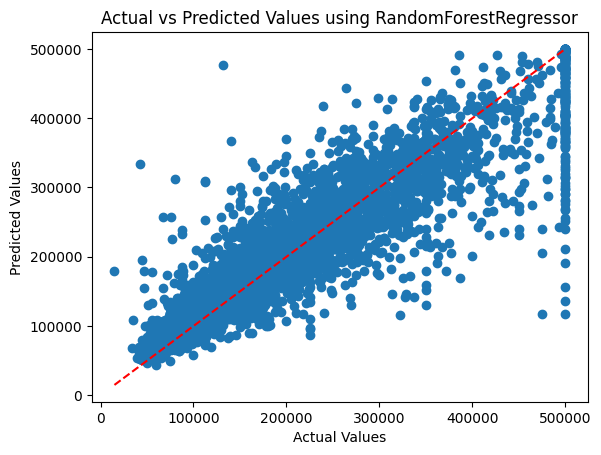

In [28]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values using RandomForestRegressor')
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Fit (y = x)')

In [29]:
forest.score(X_test, y_test)

0.8113708338637204